In [98]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

titanic_set = pd.read_csv("G:/Meu Drive/Mestrado/Disciplinas/RP/disciplina_rp/classification_datasets/titanic_train_and_test2.csv")
titanic_set.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [99]:
#repetindo alguns tratamentos anteriores aplicados no exercicio de classificacao

#alterando nome da ultima coluna
titanic_set.rename(columns={"2urvived": "Survived"})

#removendo as colunas que não serão consideradas
titanic_set.drop(titanic_set.columns[titanic_set.columns.str.contains('zero')], axis=1, inplace=True)

 #o id não contribui com informações na classificação
titanic_set = titanic_set.drop('Passengerid', 1)

#verifiquei que haviam dois registros com valores nulos na coluna Embarked, portant removi
titanic_set.dropna(inplace=True)
titanic_set.isnull().sum()
titanic_set.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [100]:
y = titanic_set.Survived
X = titanic_set.drop('Survived', 1)

len(X), X.shape, len(y), y.shape

(1307, (1307, 7), 1307, (1307,))

Verificando a distribuição da base com relação às caracteristicas:

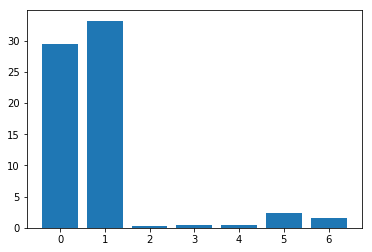

In [101]:
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

Observamos que as duas primeiras caracteristicas destoam muito das demais, 
Assim, utilizaremos uma padronização para mitigar pioras no classificador que for sensível a isso, como o KNN

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


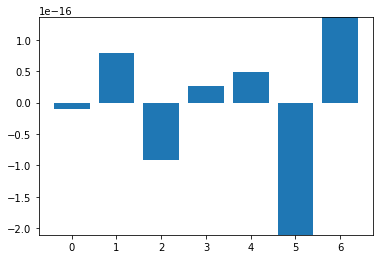

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#verificando novamente
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

Melhorou bastante a distribuição das características. 
Vamos prosseguir com a construção dos dois modelos de classificação que queremos analisar LinearRegression e KNN utilizando cross_validate para avaliação.

In [103]:
#separando a base em treino e teste antes de treinar os modelos

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
def getTestScores_CV(classificador, p_X, p_y):
    '''
    Cross-Validate -> StratifiedKFold default
    '''
    model = Pipeline([
        ("padronizacao", scaler),
        ("classificador", classificador)
    ])

    scores = cross_validate(model, p_X, p_y)
    test_scores = np.mean(scores['test_score'])
    return test_scores

def getTestScores_CVS(classificador, p_X, p_y):
    model = Pipeline([
        ("padronizacao", scaler),
        ("classificador", classificador)
    ])

    scores = cross_val_score(model, p_X, p_y, cv=5) #5-StratifiedKFold
    return scores


In [105]:
scores = getTestScores_CVS(LogisticRegression(solver='lbfgs', max_iter=400), X, y)
print(f"Scores KFold CV = {scores}")

Scores KFold CV = [0.79389313 0.84732824 0.8045977  0.70498084 0.7164751 ]


In [106]:
#VER ONDE USAR X_TREINO Y_TREINO dividido

#precisei aumentar as iterações, pois não estava convergindo com o padrão
modeloLR = LogisticRegression(solver='lbfgs', max_iter=400)
test_scoresLR = getTestScores_CV(modeloLR, X, y)
print(f"Score LinearRegression: {test_scoresLR}")

Score LinearRegression: 0.7734886942493665


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


# Comparando classificadores 
As abordagens a seguir seguem utilizando na Parte I - cross_validate e na Parte II - KFold
### Parte 1 - cross_validate

LogisticRegression
0| k = 2 score: 0.741
1| k = 3 score: 0.773
2| k = 4 score: 0.770
3| k = 5 score: 0.773
4| k = 6 score: 0.780
5| k = 7 score: 0.780
6| k = 8 score: 0.777
7| k = 9 score: 0.782
8| k = 10 score: 0.781
9| k = 11 score: 0.782
KNeighborsClassifier
0| k = 2 score: 0.742
1| k = 3 score: 0.760
2| k = 4 score: 0.754
3| k = 5 score: 0.759
4| k = 6 score: 0.754
5| k = 7 score: 0.756
6| k = 8 score: 0.751
7| k = 9 score: 0.749
8| k = 10 score: 0.754
9| k = 11 score: 0.757


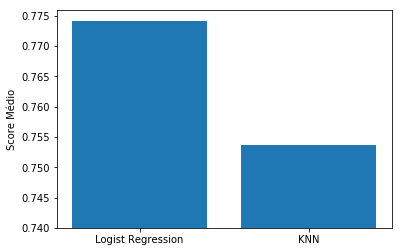

In [109]:
from sklearn.model_selection import GridSearchCV

classifiers = [
    LogisticRegression(solver='lbfgs', max_iter=400),
    KNeighborsClassifier()]

results = []
for classifier in classifiers:
    steps = [
        ('padronizacao', scaler),
        ('classificador', classifier)
    ]

    pipeline = Pipeline(steps)
    clf = str(classifier).split('(')[0]

    #, scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False) --- no cross_validate

    print(f"{clf}")    
    for i in range(10):
        scores = cross_validate(pipeline, X, y, cv=i+2)    #forcei variar o parâmetro k para verificar os diferentes valores obtidos
        test_scores = np.mean(scores['test_score'])
        results.append(test_scores)
        print(f"{i}| k = {i+2} score: %.3f" % test_scores)    

div = int(len(results)/2)
colunas = ['Logist Regression', 'KNN']
mean_logistic = np.mean(results[:div])
mean_knn = np.mean(results[div:])

plt.bar(colunas, np.array( [mean_logistic, mean_knn]) - 0.74, bottom=0.74)
plt.ylabel("Score Médio")
plt.show()
    

LogisticRegression
0| k = 2 score: 0.780
1| k = 3 score: 0.780
2| k = 4 score: 0.780
3| k = 5 score: 0.780
4| k = 6 score: 0.780
5| k = 7 score: 0.780
6| k = 8 score: 0.780
7| k = 9 score: 0.780
8| k = 10 score: 0.780
9| k = 11 score: 0.780
KNeighborsClassifier
0| k = 2 score: 0.731
1| k = 3 score: 0.731
2| k = 4 score: 0.731
3| k = 5 score: 0.731
4| k = 6 score: 0.731
5| k = 7 score: 0.731
6| k = 8 score: 0.731
7| k = 9 score: 0.731
8| k = 10 score: 0.731
9| k = 11 score: 0.731


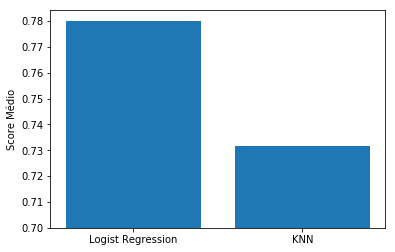

In [110]:
results = []
for classifier in classifiers:
    steps = [
        ('padronizacao', scaler),
        ('classificador', classifier)
    ]

    pipeline = Pipeline(steps)
    clf = str(classifier).split('(')[0]

    print(f"{clf}")    
    for i in range(10):
        #scores = cross_validate(pipeline, X, y, cv=i+2)    #forcei variar o parâmetro k para verificar os diferentes valores obtidos
        #test_scores = np.mean(scores['test_score'])
        pipeline.fit(X_train, y_train)   
        test_score = pipeline.score(X_test, y_test)
        results.append(test_score)
        print(f"{i}| k = {i+2} score: %.3f" % test_score)    

div = int(len(results)/2)
colunas = ['Logist Regression', 'KNN']
mean_logistic = np.mean(results[:div])
mean_knn = np.mean(results[div:])

plt.bar(colunas, np.array( [mean_logistic, mean_knn]) - 0.70, bottom=0.70)
plt.ylabel("Score Médio")
plt.show()

In [111]:
from sklearn.model_selection import ShuffleSplit

results = []
for classifier in classifiers:
    steps = [
        ('padronizacao', scaler),
        ('classificador', classifier)
    ]

    pipeline = Pipeline(steps)
    clf = str(classifier).split('(')[0]

    print(f"{clf}")    
    for i in range(10):
        
        cv = ShuffleSplit(n_splits=(i+2), test_size=0.3, random_state=0) #mais uma vez, variei o splits para verificar resultados diferentes
        test_scores = cross_val_score(classifier, X, y, cv=cv)
        m = np.mean(test_scores)
        results.append(m)
        print(f"{i}| k = {i+2} score: %.3f" % m)    

div = int(len(results)/2)
colunas = ['Logist Regression', 'KNN']
mean_logistic = np.mean(results[:div])
mean_knn = np.mean(results[div:])

plt.bar(colunas, np.array( [mean_logistic, mean_knn]) - 0.70, bottom=0.70)
plt.ylabel("Score Médio")
plt.show()

LogisticRegression


TypeError: estimator should be an estimator implementing 'fit' method, 'LogisticRegression' was passed